In [2]:
# Intuition behind the power spectral density

Let's exampine the equation for the Fourier transform

$$X_j = \sum_{n=1}^{N}x_n \exp(-2\pi i f_j t_n).$$

and the equation for the spectrum 

$$S_{xx, j} = \frac{2\Delta^2}{T}X_j X_j^*,$$


### What is the Fourier transform actually doing?

The Fourier transform represents the data $x$ as a linear combination of sinusoids with different frequencies. To see this, consider again:

$$X_j = \sum_{n=1}^{N}x_n \exp(-2\pi i f_j t_n).$$

What is this expression actually doing? Let's consider this equation piece by piece. The first term,

$$\sum_{n=1}^N$$

represents a sum over the indices of $x_n$. Because each subsequent index represents a step forward in time of $\Delta$, this sum represents a sum over time. In fact, this sum extends from the first index ($n=1$) to the last index ($n = N$) of the data, so the summation occurs over the entire duration of the recording. Adding the second term,

$$\sum_{n=1}^N x_n$$

the summation now acts on the data $x_n$, so we're summing up the data over all indices or equivalently over the entire time of recording. The third term, 

$$\exp(-2\pi i f_j t_n),$$

consists of an exponential ($\exp$) operating on the product of five individual terms, each of which is a number. The first two numbers are simple: $-2 \pi$. The third number is $i \equiv \sqrt{-1}$, a quantity representing an *imaginary unit*. 



The utility of the imaginary unit is that we can rewrite the exponential as the sum of a sine and cosine function. Remember from caclulus the remarkable [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula):

$$\exp(-2\pi i f_j t_n) = \cos(-2\pi f_j t_n) + i \sin(-2\pi f_j t_n).$$

Notice that the $i$ now appears multiplying the sine term, and not inside the arguments of either sinusoid. Both sinusoids operate on the product of $2\pi$ and two terms, the frequency $f_j$ and the time $t_n$. Rewriting the equation for the Fourier transform using Euler's formula, we find<a id="eq:3.10"></a>

\begin{equation}\tag{*}\label{eq:*}
X_j = \left(\sum_{n=1}^N x_n \cos(-2\pi f_j t_n) \right) + i\left(\sum_{n=1}^N x_n \sin(-2\pi f_j t_n)\right), 
\end{equation}

where the summation is distributed over both terms.



Written in this way, the Fourier transform becomes easier to interpret. Let’s consider the first term of the equation above. For each index $n$, we multiply the data $x_n$ by a cosine function evaluated at frequency $f_j$ and time $t_n$. We then sum the results of this multiplication over all indices from $n=1$ to $n=N$, or equivalently, from time $t_n = \Delta$ to time $t_n =T$. So, we multiply the data by a cosine function at frequency $f_j$ for each point in time and sum the product over time. The second term of the equation is like the first, except we multiply the data $x_n$ by a sine function.

We may therefore think of the Fourier transform as comparing the data $x$ to the sinusoids oscillating at frequency $f_j$. When the data and sinusoid at frequency $f_j$ align the summation in the Fourier transform is large and the result $X_j$ is a large number. When the data and sinusoid at frequency $f_j$ do not align, the summation in the Fourier transform is small and $X_j$ is a tiny number.

To make these ideas more concrete, we can consider some simple examples. In these examples, the data $x$ will be a perfect cosine with frequency 10 Hz.

In [3]:
# Prepare the modules and plot settings
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel, plot, show, title
%matplotlib inline
rcParams['figure.figsize'] = (12,3)

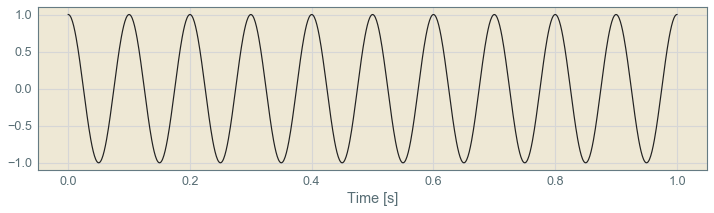

In [4]:
tt = np.linspace(0, 1, 1000)     # Create a time variable (in seconds)
x = np.cos(2 * np.pi * 10 * tt)  # Generate the data, a 10 Hz cosine
plot(tt, x, 'k')                 # Plot the result
xlabel('Time [s]')
show()

Choosing $f_j = 4$ Hz, we can construct a sine and cosine function each oscillating at 4 Hz.

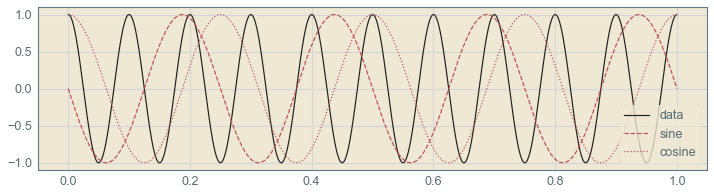

In [5]:
fj = 4                                 # Set frequency
fj_sin = np.sin(-2 * np.pi * fj * tt)  # construct sine wave
fj_cos = np.cos(-2 * np.pi * fj * tt)  # ... and cosine
plot(tt, x, 'k', label='data')         # Plot the data
plot(tt, fj_sin, 'r--', label='sine')  # ... and the sine
plot(tt, fj_cos, 'r:', label='cosine') # ... and cosine
plt.legend()
show()

Then, to perform the calculation of the Equation (*) we multiply the data $x$ by the sinusoids at each point in time.

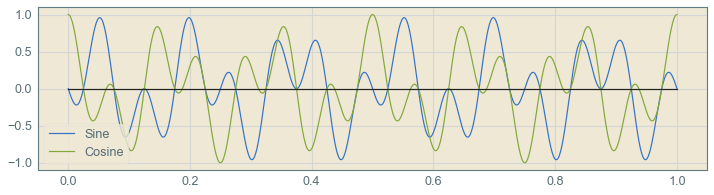

In [6]:
plot(tt, x * fj_sin, tt,  )  # Plot the product of x with the sinusoids
plt.legend(['Sine', 'Cosine'])
plot(tt, np.zeros_like(tt), 'k')      # Show zero
show()

Notice that the products alternate between positive and negative values throughout time. 

<div class="alert alert-block alert-info">
<p>**Q.** In this case, what is the approximate value of $X_j$ when $f_j = 4$ Hz?</p>
</div>



<div class="alert alert-block alert-info">
<p>**A.** We know that $X_j$ is the summation over time of the product of $x$ and the sinusoids,
    
$$
X_j = \left(\sum_{n=1}^N x_n \cos(-2\pi f_j t_n) \right) + i\left(\sum_{n=1}^N x_n \sin(-2\pi f_j t_n)\right), 
$$
    
Above, we plotted these products over time. Because each product alternates between positive and negative values roughly equally over time, the summation of the product over time is approximately zero. We therefore conclude that both the real part (i.e., the cosine term) and the imaginary part (i.e. the sine term) are small and $X_j \approx 0 + 0i$ when $f_j = 4$ Hz. </p>
</div>

In this case, the sinusoids at frequency $f_j = 4$ Hz do not align with the data $x$, and $X_j$ is nearly zero in both its real and imaginary parts. Now consider the case in which we choose $f_j = 10$ Hz. With this choice of $f_j$, the data $x$ and the cosine function align perfectly. 

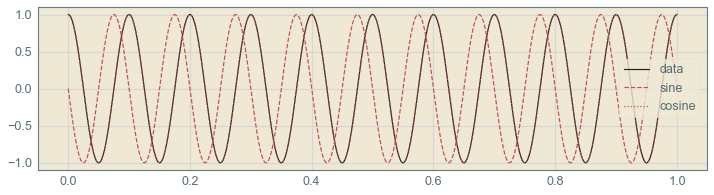

In [7]:
fj = 10                                 # Set the frequency
fj_sin = np.sin(-2 * np.pi * fj * tt)  # Construct the sine wave
fj_cos = np.cos(-2 * np.pi * fj * tt)  # ... and cosine wave

plot(tt, x, 'k', label='data')         # Plot the data
plot(tt, fj_sin, 'r--', label='sine')  # ... and the sine
plot(tt, fj_cos, 'r:', label='cosine') # ... and cosine
plt.legend()
show()

<div class="alert alert-block alert-info">
**Q.** Can you predict how the plot of the product of the data with the overlapping cosine function will look? 
</div>

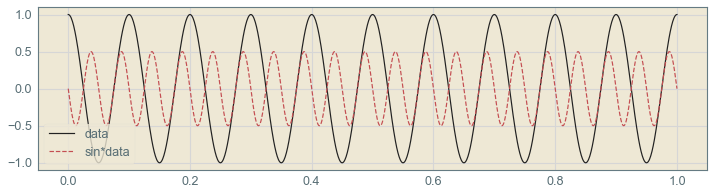

In [12]:

plot(tt, x, 'k', label='data')         # Plot the data
plot(tt, x*fj_sin, 'r--', label='sin*data')  # ... and the sine
plt.legend()
show()

The product of the cosine function and the data is always non-negative, and therefore its summation over time results in a large positive number. In this case, the real part of $X_j$ is large because the cosine function with frequency $f_j =10$ Hz and the data $x$ match. In this sense, the Fourier transform reveals the dominant frequencies of the underlying time series.

<div class="alert alert-block alert-info">
**Q.** What is the approximate value of the *imaginary* part of $X_j$ for $f_j = 10$ Hz? *Hint*: Consider the plot of the product of the sine function and the data.
</div>